<h2>Table of Contents</h2>
<p>In this lab, you will learn to select the best learning rate by using validation data.</p>

<ul>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#LR_Loader_Cost">Create a Linear Regression Object, Data Loader and Criterion Function</a></li>
    <li><a href="#LR_Hyper">Different learning rates and Data Structures to Store results for Different Hyperparameters</a></li>
    <li><a href="#Model">Train different modules for different Hyperparameters</a></li>
    <li><a href="#Result">View Results</a></li>
</ul>

<p>Estimated Time Needed: <strong>30 min</strong></p>

<hr>


In [2]:
# Import libraries we need for this lab, and set the random seed

from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim

## Make Some Data

In [3]:
# Import libraries we need for this lab, and set the random seed

from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim

## Make Some Data

In [4]:
#Create Data class
from torch.utils.data import Dataset,DataLoader

In [6]:
# Create Data class

from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    
    # Constructor
    def __init__(self, train = True):
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]
            
            #outliers 
            if train == True:
                self.y[0] = 0
                self.y[50:55] = 20
            else:
                pass
      
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [7]:
train_data =Data()
val_data =Data(train=False)

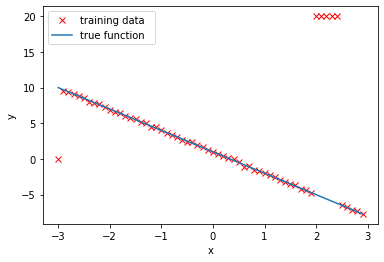

In [8]:
# Plot out training points

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr',label="training data ")
plt.plot(train_data.x.numpy(), train_data.f.numpy(),label="true function  ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Create a linear Regression Object, Data Loader and Criterion Function

In [15]:
# Create Linear Regression Class
from torch import nn

class linear_regression(nn.Module):
  #Contructor
  def __init__(self,input_size,output_size):
    super(linear_regression, self).__init__()
    self.linear = nn.Linear(input_size, output_size)
    
  # Prediction function
  def forward(self, x):
      yhat = self.linear(x)
      return yhat

In [10]:
# Create MSELoss function and DataLoader

criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

In [38]:
# Create Learning Rate list, the error lists and the MODELS list

learning_rates=[0.0001, 0.001, 0.005, 0.01, 0.05, 0.07, 0.1]

train_error=torch.zeros(len(learning_rates))
validation_error=torch.zeros(len(learning_rates))

MODELS=[]

## Train different model for different Hyperparamter

In [39]:
# Define the train model function and train the model

def train_model_with_lr (iter, lr_list):
    
    # iterate through different learning rates 
    for i, lr in enumerate(lr_list):
        model = linear_regression(1, 1)
        optimizer = optim.SGD(model.parameters(), lr = lr)
        for epoch in range(iter):
            for x, y in trainloader:
                yhat = model(x)
                loss = criterion(yhat, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
        # train data
        Yhat = model(train_data.x)
        train_loss = criterion(Yhat, train_data.y)
        train_error[i] = train_loss.item()
    
        # validation data
        Yhat = model(val_data.x)
        val_loss = criterion(Yhat, val_data.y)
        validation_error[i] = val_loss.item()
        MODELS.append(model)

train_model_with_lr(10, learning_rates)

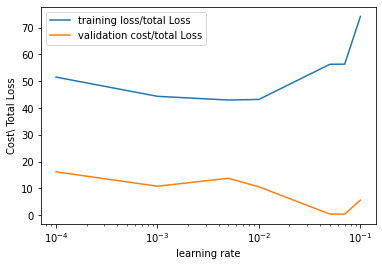

In [40]:
# Plot the training loss and validation loss

plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total Loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

Produce a prediction by using the validation data for each model:  


i [[2.448382 ]
 [2.3762183]
 [2.3040547]]
i [[5.333387 ]
 [5.2180834]
 [5.1027794]]
i [[6.3228645]
 [6.2093835]
 [6.0959024]]
i [[6.57088  ]
 [6.437722 ]
 [6.3045635]]
i [[11.091279]
 [10.773797]
 [10.456314]]
i [[11.069157]
 [10.751801]
 [10.434443]]
i [[14.434616]
 [14.001176]
 [13.567735]]


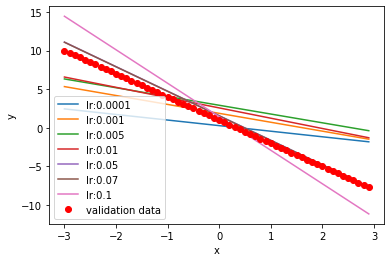

In [41]:
# Plot the predictions

i = 0
for model, learning_rate in zip(MODELS, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label = 'lr:' + str(learning_rate))
    print('i', yhat.detach().numpy()[0:3])
plt.plot(val_data.x.numpy(), val_data.f.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Practice
The object <code>good_model</code> is the best performing model. Use the train loader to get the data samples x and y. Produce an estimate for <code>yhat</code> and print it out for every sample in a for a loop. Compare it to the actual prediction <code>y</code>.


In [45]:
min=np.inf
index =np.inf
for i,(train,valid) in enumerate(zip(train_error.numpy(),validation_error.numpy())):
  if (min>abs(train-valid)):  
    min = abs(train-valid)
    index =i
print("Best learning rate: ",learning_rates[index])
print("train_err: ",train_error.numpy()[index])
print("validation_err: ",validation_error.numpy()[index])

Best learning rate:  0.005
train_err:  42.983967
validation_err:  13.799515
